<a href="https://colab.research.google.com/github/lilkandra/HwDigits_recognition/blob/main/HwDigits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from PIL import Image

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((28, 28)), transforms.Grayscale(num_output_channels=4), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


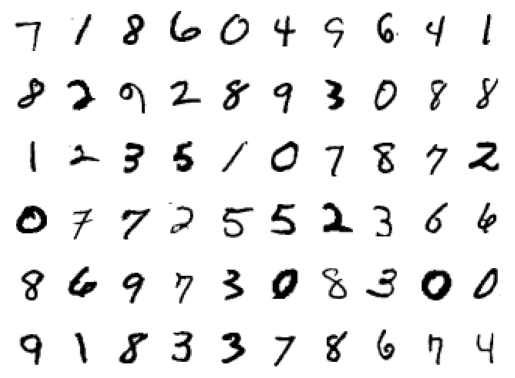

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        ...,
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.66320399638178
Epoch 1 - Training loss: 0.2905470584072411
Epoch 2 - Training loss: 0.22691872839464436
Epoch 3 - Training loss: 0.18491308137710924
Epoch 4 - Training loss: 0.15319999945320206
Epoch 5 - Training loss: 0.1315866554839048
Epoch 6 - Training loss: 0.11525423936386987
Epoch 7 - Training loss: 0.10236814536495821
Epoch 8 - Training loss: 0.0922356875929068
Epoch 9 - Training loss: 0.08209173081279882
Epoch 10 - Training loss: 0.0753847626971204
Epoch 11 - Training loss: 0.06934672972879438
Epoch 12 - Training loss: 0.0649106732042415
Epoch 13 - Training loss: 0.05841451112194849
Epoch 14 - Training loss: 0.05357480626220682

Training Time (in minutes) = 3.9168237447738647


In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
plt.axis('off')
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze())
print("Predicted Digit =", probab.index(max(probab)))


ValueError: num_output_channels should be either 1 or 3

In [ ]:
torch.save(model, './HwDigits_recognition_model.pt')